# Análisis exploratorio de las consecuencias del covid 19 y el voto en EEUU
---------------------------

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### PREPROCESAMIENTO

In [2]:
df=pd.read_csv('nonvoters.csv')
df=df.loc[:,['Q11_1','Q11_2','Q11_3','Q11_4','Q11_5','Q11_6','race','gender','income_cat','voter_category','Q21','Q23','Q24','Q30']]

In [3]:
df.rename(columns={'Q21':'vote_intention', 'Q23':'vote_who', 'Q24': 'method', 'Q30':'ideology'},inplace=True)

In [4]:
df

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,race,gender,income_cat,voter_category,vote_intention,vote_who,method,ideology
0,2,2,2,2,2,2,White,Female,$75-125k,always,1,2,1,2
1,2,2,1,2,2,2,White,Female,$125k or more,always,1,1,3,3
2,2,2,1,2,1,2,White,Male,$125k or more,sporadic,1,2,1,2
3,1,2,2,2,1,2,Black,Female,$40-75k,sporadic,1,2,1,2
4,2,2,1,2,2,2,White,Male,$40-75k,always,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,2,2,1,2,2,2,Hispanic,Male,$40-75k,always,1,2,1,2
5832,2,2,2,2,2,2,White,Female,$125k or more,rarely/never,1,2,1,2
5833,2,2,1,2,2,2,Other/Mixed,Male,$125k or more,sporadic,1,2,3,2
5834,2,2,2,2,2,2,Black,Female,Less than $40k,always,3,3,3,3


In [5]:
indexNames = df[ (df['vote_intention'] == -1) | (df['vote_who'] == -1) | (df['method'] == -1)| (df['ideology'] == -1)].index
df.drop(indexNames , inplace=True)

In [6]:
indexNames = df[ (df['Q11_1'] == -1) | (df['Q11_2'] == -1) |(df['Q11_3'] == -1) | (df['Q11_4'] == -1) | (df['Q11_5'] == -1) | (df['Q11_6'] == -1)].index
df.drop(indexNames , inplace=True)

----------------------------------------------------------

### ESTUDIO UNIVARIANTE

##### Intención de voto de los estadounidenses

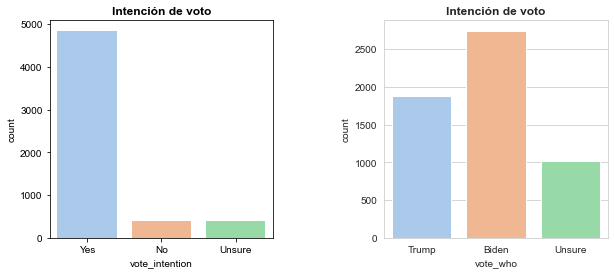

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(data= df, x= 'vote_intention',y='Q11_1', estimator = len, palette='pastel')
plt.ylabel('count')
sns.set_style('whitegrid')
plt.title('Intención de voto', fontweight = 'bold')
plt.xticks([0,1,2], labels=['Yes', 'No','Unsure'])

plt.subplot(1,2,2)
sns.barplot(data= df, x= 'vote_who',y='Q11_1', estimator = len, palette='pastel')
plt.ylabel('count')
plt.title('Intención de voto', fontweight = 'bold')
plt.xticks([0,1,2], labels=['Trump', 'Biden','Unsure'])
sns.set_style('whitegrid')
plt.subplots_adjust(wspace = 0.5)
plt.show()

Casi todos los ecuentados tenían intención de votar en las elecciones, además parece que el candidato más votado fue Biden, con una diferencia de casi 1000 votos sobre Trump.

##### Cercanía al covid de los estadounidenses

In [8]:
df.rename(columns={'Q11_1':'perdio_trabajo','Q11_2':'cogio_covid','Q11_3':'allegado_covid','Q11_4':'allegado_fallece','Q11_5':'preocupado','Q11_6':'dejo_trabajo',},inplace=True)

In [9]:
df.loc[:,'perdio_trabajo':'dejo_trabajo']=df.loc[:,'perdio_trabajo':'dejo_trabajo'].replace(2,0)
df.loc[:,'vote_who']=df.loc[:,'vote_who'].replace(1,'Trump')
df.loc[:,'vote_who']=df.loc[:,'vote_who'].replace(2,'Biden')
df.loc[:,'vote_who']=df.loc[:,'vote_who'].replace(3,'Unsure')

In [10]:
df['closeness']= df.perdio_trabajo+df.dejo_trabajo+df.allegado_covid+df.allegado_fallece+df.cogio_covid+df.preocupado

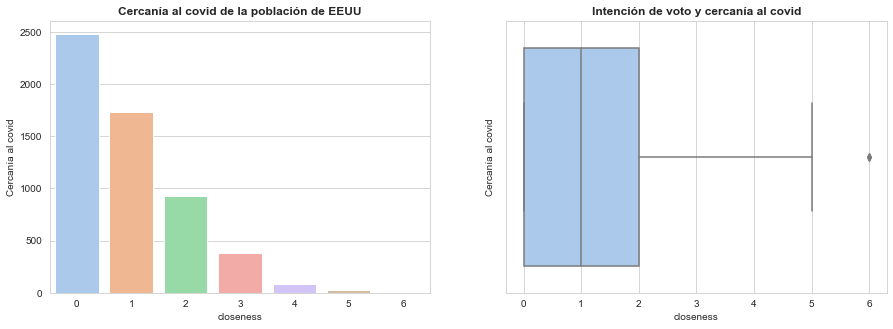

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df.closeness, palette='pastel')
plt.ylabel('Cercanía al covid')
plt.title('Cercanía al covid de la población de EEUU', fontweight = 'bold')
sns.set_style('whitegrid')

plt.subplot(1,2,2)
sns.boxplot( data= df, x= 'closeness',  palette='pastel')
plt.ylabel('Cercanía al covid')
plt.title('Intención de voto y cercanía al covid', fontweight = 'bold')
sns.set_style('whitegrid')
plt.subplots_adjust(hspace = 0.5)
plt.show()

Por encima de 1500 personas de nuestra muestra han tenido alguna incidencia provocada por la pandemia como haber perdido su trabajo, haberlo cogido ellos mismos o un familiar, estar preocupado... No obstante la mayor parte de las personas no han sufrido ninguna de estas consecuencias. El número de personas que ha sufrido 2 ,3, 4, 5 o 6 de ellas al mismo tiempo es considerablemente reducido.

##### Prevalencia de cada tipo de incidencia

In [12]:
suma=[]
variables=['perdio_trabajo','cogio_covid','allegado_covid','allegado_fallece','preocupado','dejo_trabajo']
for variable in variables:
    suma.append(sum(df[variable]))
suma

[745, 125, 2222, 761, 1259, 107]

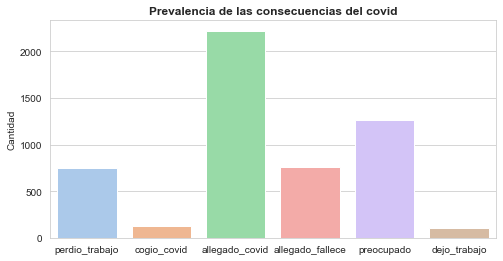

In [13]:
plt.figure(figsize=(8,4))
sns.barplot(x=variables,y=suma, palette='pastel')
plt.ylabel('Cantidad')
plt.title('Prevalencia de las consecuencias del covid', fontweight = 'bold')
sns.set_style('whitegrid')

La consecuencia provocada por el covid más común ha sido que un allegado haya cogido el virus, seguida de estar preocupado. Cabe resaltar que hay menos personas preocupadas por el virus que personas con un allegado que lo haya pillado.

Las consecuencias menos comunes han sido que las personas hayan tenido que dejar su trabajo para cuidar de un fmailiar y que la persona cogiese el covid.

De las 5633 personas personas encuentadas, 745 perdieron su trabajo como consecuencia del covid. Esto supone un 13.3% de todos los encuestados. 

---------------------------------------------

### ESTUDIO BIVARIANTE

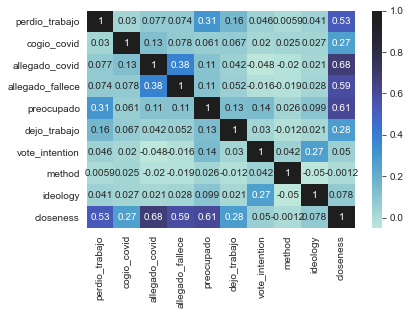

In [14]:
sns.heatmap(df.corr(), annot = True, center=True)
plt.show()

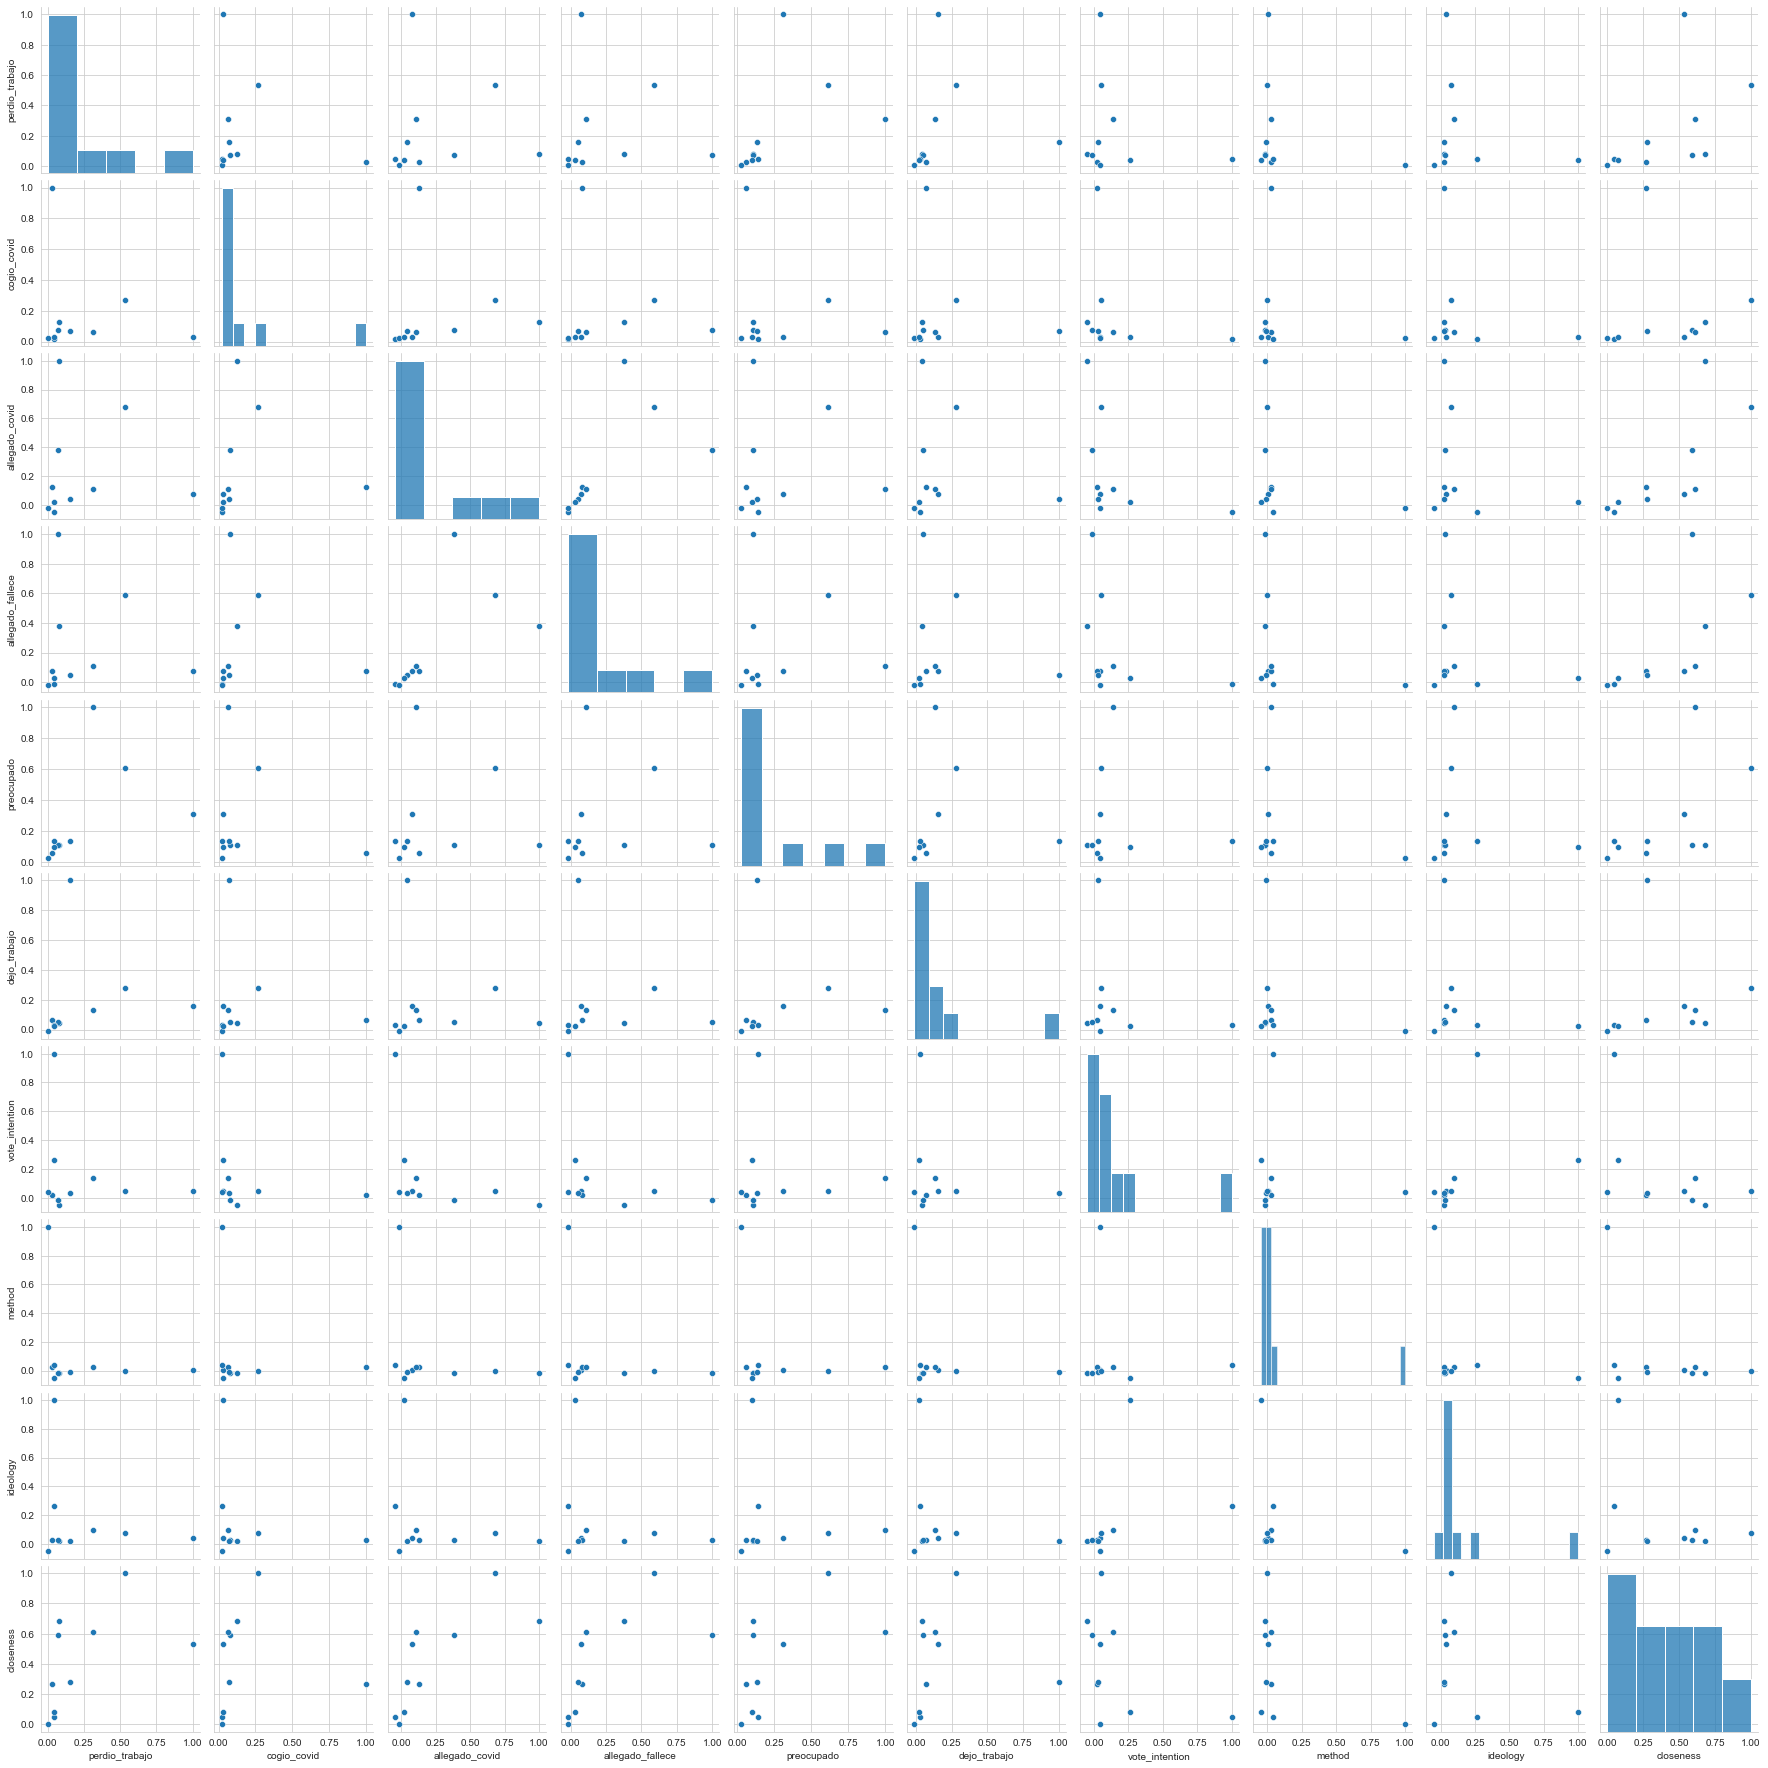

In [15]:
sns.pairplot(df.corr())
plt.show()

----------------------------------------------------------

##### Intención de voto y cercanía al covid

Hipótesis: como Trump por lo general priorizó la economía a la sanidad, la gente que ha tenido mayor cercanía con el covid tenderá a votar a otro candidato que prometa cuidar más este aspecto

In [44]:
def barras(x, etiquetas,titulo ,posicion):
    plt.subplot(2,2,posicion)
    sns.barplot(data= df, x= x, y= 'closeness', palette='pastel')
    plt.ylabel('Media de cercanía al covid')
    plt.title(titulo, fontweight = 'bold')
    plt.axis([-1, 3, 0, 6])
    plt.xticks([0,1,2], labels=etiquetas)
    sns.set_style('whitegrid')

def cajas(x, etiquetas,titulo ,posicion):
    plt.subplot(2,2,posicion)
    sns.boxplot(data= df, x= x,y= 'closeness', palette='pastel')
    plt.ylabel('Cercanía al covid')
    plt.title(titulo, fontweight = 'bold')
    plt.xticks([0,1,2], labels=etiquetas)
    sns.set_style('whitegrid')

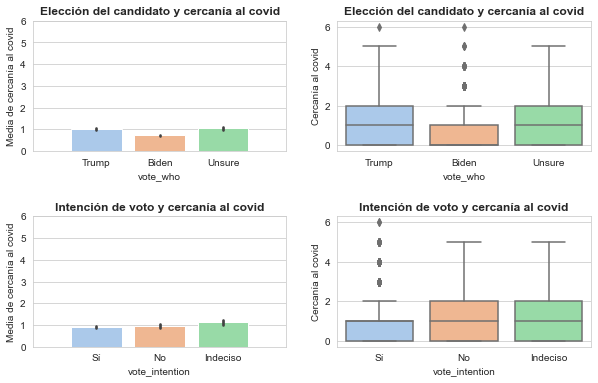

In [46]:
plt.figure(figsize=(10,6))
barras('vote_who',['Trump', 'Biden','Unsure'],'Elección del candidato y cercanía al covid',1)
cajas('vote_who',['Trump', 'Biden','Unsure'],'Elección del candidato y cercanía al covid',2)
barras('vote_intention',['Sí', 'No','Indeciso'],'Intención de voto y cercanía al covid',3)
cajas('vote_intention',['Sí', 'No','Indeciso'],'Intención de voto y cercanía al covid',4)
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.2)
plt.show()

No parece que exista una relación muy fuerte entre la cercanía con el covid 19 y la elección de un candidato a presidente. 
De hecho, al contrario de lo que se esperaba, las personas que menos cercanía tienen son las que votaron a Biden. No obstante, la diferencia es tan baja que lo más probable es que no sea significativa.  

Tampoco parece que exista relación entre la cercanía con el covid y si se pretende votar o no. Llama la atención que la gente que ha tenido mayor cercanía con el virus es precisamente la que más indecisa está con respecto a si ir a votar o no. Una vez más, esta diferecia es tan baja que tampoco se espera que sea significativa.

----------------------------------------------------------

##### Intención de voto e incidencia provocada por el covid

In [17]:
df.loc[:,'perdio_trabajo':'dejo_trabajo']=df.loc[:,'perdio_trabajo':'dejo_trabajo'].replace(0,'No') 
df.loc[:,'perdio_trabajo':'dejo_trabajo']=df.loc[:,'perdio_trabajo':'dejo_trabajo'].replace(1,'Sí') 

In [35]:
def graf(x, titulo, posicion):
    plt.subplot(2,3,posicion)
    sns.barplot(data= df, x= x,y= 'vote_intention',hue='vote_who',estimator = len, ci = 'sd', palette='Set2')
    plt.ylabel('Cantidad')
    plt.title(titulo, fontweight = 'bold')

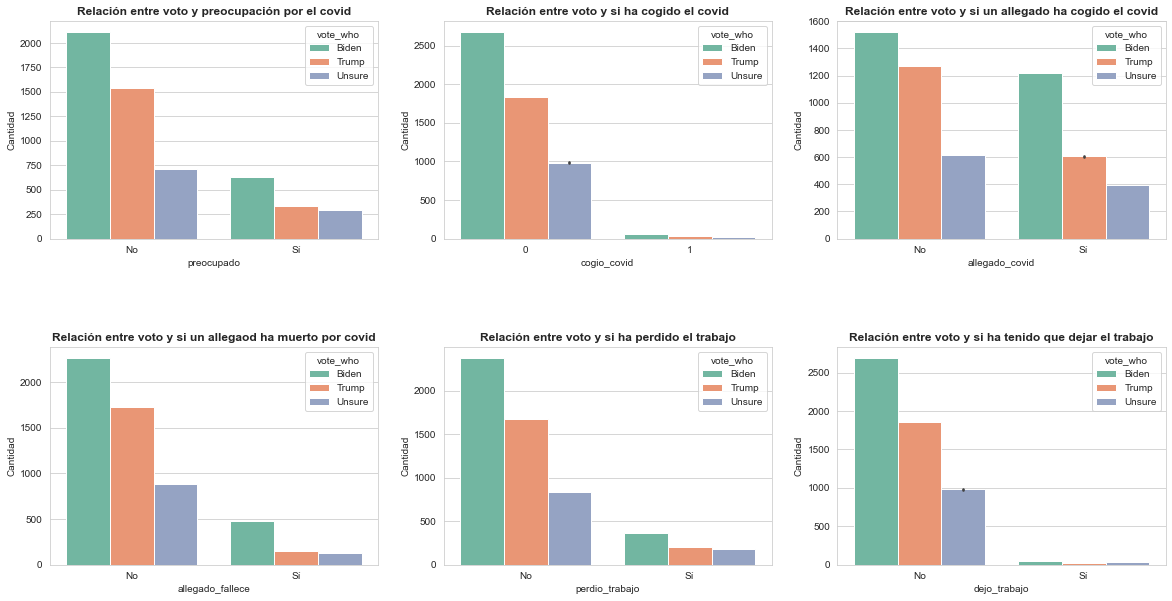

In [38]:
plt.figure(figsize=(20,10))

graf('preocupado','Relación entre voto y preocupación por el covid', 1)
graf('cogio_covid','Relación entre voto y si ha cogido el covid', 2)
graf('allegado_covid','Relación entre voto y si un allegado ha cogido el covid', 3)
graf('allegado_fallece','Relación entre voto y si un allegaod ha muerto por covid', 4)
graf('perdio_trabajo','Relación entre voto y si ha perdido el trabajo', 5)
graf('dejo_trabajo','Relación entre voto y si ha tenido que dejar el trabajo', 6)

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.2)
plt.show()

No parece que exista relación entre la prevalencia de las incidencias del covid y la elección del voto. 

En todas las casillas se puede observar como la intención de voto se mantiene igual independientemente de si la circunstancia que describe la VI cambia. Por ejemplo, en el primer gráfico observamos como independientemente de si están preocupados o no, la mayor parte de los participantes quieren votar a Biden, seguido de Trump y de Indecisos. Que no haya no haber diferencias en la intención de voto entre las personas preocupadas y las no preocupadas nos hace pensar que no existe relación entre estas dos variables. Lo mismo ocurriría con el resto. 

----------------------------------------------------------

##### ¿La gente con menos ingresos ha estado en mayor contacto con el covid?

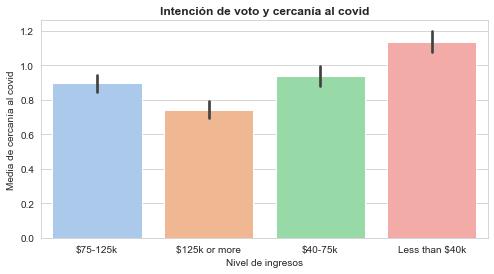

In [19]:
plt.figure(figsize=(8,4))
sns.barplot( data= df, x= 'income_cat',y= 'closeness',  palette='pastel')
plt.xlabel('Nivel de ingresos')
plt.ylabel('Media de cercanía al covid')
plt.title('Intención de voto y cercanía al covid', fontweight = 'bold')
sns.set_style('whitegrid')
plt.show()

Efectivamente, parece que la gente con menores ingresos es la que ha tenido más presente los problemas generados por la pandemia.Además, se observa que a medida que los ingresos de las personas aumentan, menor es su cercanía con ellos.

----------------------------------------------------------

##### ¿Por qué método de voto se decanta cada ideología?

In [20]:
df.loc[:,'method']=df.loc[:,'method'].replace(1,'Por correo')
df.loc[:,'method']=df.loc[:,'method'].replace(2,'En persona (día de las eleccciones)')
df.loc[:,'method']=df.loc[:,'method'].replace(3,'En persona (días antes)')
df.loc[:,'method']=df.loc[:,'method'].replace(4,'Otros')

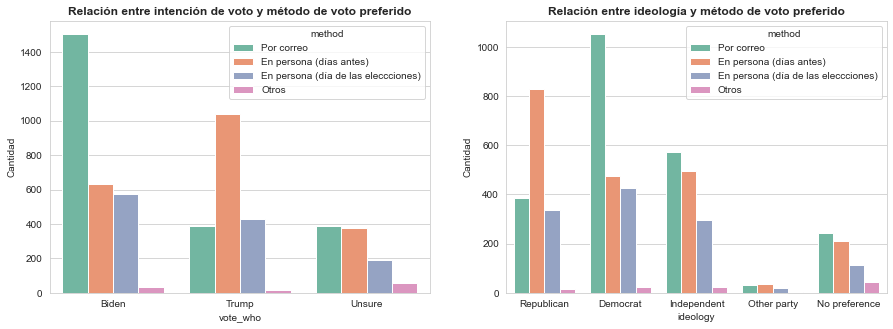

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data= df, x= 'vote_who',hue='method',palette='Set2')
plt.ylabel('Cantidad')
plt.title('Relación entre intención de voto y método de voto preferido', fontweight = 'bold')

plt.subplot(1,2,2)
sns.countplot(data= df, x= 'ideology',hue='method',palette='Set2')
plt.ylabel('Cantidad')
plt.xticks([0,1,2,3,4], labels=['Republican', 'Democrat','Independent', 'Other party', 'No preference'])
plt.title('Relación entre ideología y método de voto preferido', fontweight = 'bold')
plt.show()

En estas gráficas se puede observar como, tal como se predijo, los demócratas que iban a votar a Biden, prefirieron el voto por correo antes que los métodos de voto que requerían ir en persona. Por otro lado, las personas que querían votar a Trump (republicanos) preferían votar en persona.

----------------------------------------------------------

##### ¿De qué ideología son la gente que cogió el covid? --- por porcentaje

In [24]:
df.loc[:,'cogio_covid']=df.loc[:,'cogio_covid'].replace('No',0) 
df.loc[:,'cogio_covid']=df.loc[:,'cogio_covid'].replace('Sí',1) 

In [25]:
ideologiaSuma=df.groupby(['ideology'])[['cogio_covid']].sum()
ideologiaCount=df.groupby(['ideology'])[['cogio_covid']].count()
ideologiaSuma['porcentaje']=ideologiaSuma.cogio_covid/ideologiaCount.cogio_covid *100

In [30]:
dfyes=df[df.cogio_covid==1]

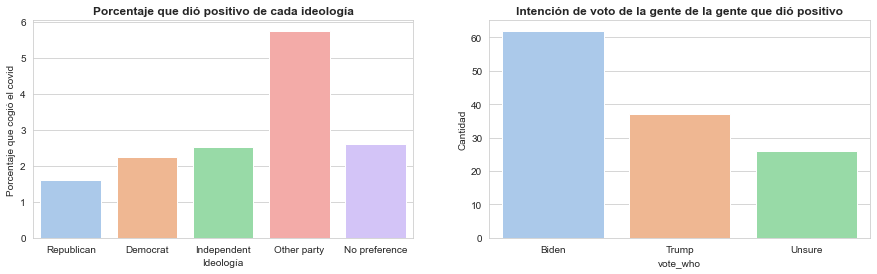

In [33]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.barplot(data= ideologiaSuma, x= ['Republican', 'Democrat','Independent', 'Other party', 'No preference'],y='porcentaje', palette='pastel')
plt.ylabel('Porcentaje que cogió el covid')
plt.xlabel('Ideología')
plt.title('Porcentaje que dió positivo de cada ideología', fontweight = 'bold')
plt.xticks([0,1,2,3,4], labels=['Republican', 'Democrat','Independent', 'Other party', 'No preference'])

plt.subplot(1,2,2)
sns.countplot(data= dfyes, x= 'vote_who',palette='pastel')
plt.ylabel('Cantidad')
plt.title('Intención de voto de la gente de la gente que dió positivo', fontweight = 'bold')
plt.show()

No se han obtenido los resultados que se esperaba. Parece que son precisamente los repubicanos los que menos han cogido el virus, por debajo incluso que los demócratas. Los que más o han cogido son los que apoyan a otros partidos. No obstante tampoco esta diferencia parece muy significativa teniendo en cuanta que todos los porcentajes van de 1 a 5.

Respecto a la intención de voto, parece que de las personas han pillado el virus, la mayoría apoyaron a Biden en las elecciones.Este resultado sí era de esperar si se tiene en cuenta que Biden parece haberse tomado más en serio las políticas de control de la pandemia.